In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler , StandardScaler
from sklearn.model_selection import train_test_split    
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report , confusion_matrix  
from sklearn import metrics

In [ ]:
df=pd.read_csv("/content/Mall_Customers.csv")

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19.0,15,39
1,2,Male,NaN,15,81
2,3,Female,20.0,16,6
3,4,Female,23.0,16,77
4,5,Female,31.0,17,40


In [ ]:
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35.0,120,79
196,197,Female,45.0,126,28
197,198,Male,32.0,126,74
198,199,Male,32.0,137,18
199,200,Male,30.0,137,83


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              200 non-null    int64  
 1   Gender                  200 non-null    object 
 2   Age                     195 non-null    float64
 3   Annual Income (k$)      200 non-null    int64  
 4   Spending Score (1-100)  200 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 7.9+ KB


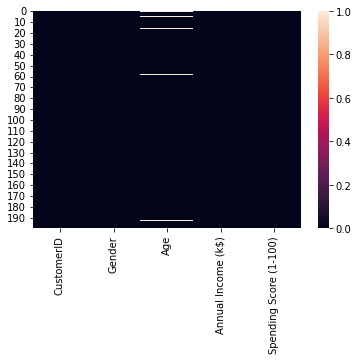

In [ ]:
n=df.isnull()
sns.heatmap(n)

In [ ]:
def nafill(cols):
  age=cols[0]
  income=cols[1]
  if pd.isnull(age):
    return 32

In [ ]:
df["newage"]=df[["Age","Annual Income (k$)"]].apply(nullhandle)
df['Annual Income (k$)']

0       15
1       15
2       16
3       16
4       17
      ... 
195    120
196    126
197    126
198    137
199    137
Name: Annual Income (k$), Length: 200, dtype: int64

In [ ]:
df.fillna(32,inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              200 non-null    int64  
 1   Gender                  200 non-null    object 
 2   Age                     200 non-null    float64
 3   Annual Income (k$)      200 non-null    int64  
 4   Spending Score (1-100)  200 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 7.9+ KB


In [ ]:
df['Gender']=pd.get_dummies(df['Gender'],drop_first=True)

In [ ]:
df["Gender"]

0      1
1      1
2      0
3      0
4      0
      ..
195    0
196    0
197    1
198    1
199    1
Name: Gender, Length: 200, dtype: uint8

In [ ]:
normal=MinMaxScaler()
normalization=normal.fit_transform(df.drop(['CustomerID', 'Gender'],axis=1))
normalization=pd.DataFrame(normalization)
normalization

,0,1,2,3
0,0.019231,0.000000,0.387755,1.0
1,0.269231,0.000000,0.816327,1.0
2,0.038462,0.008197,0.051020,1.0
3,0.096154,0.008197,0.775510,1.0
4,0.250000,0.016393,0.397959,1.0
...,...,...,...,...
195,0.326923,0.860656,0.795918,0.5
196,0.519231,0.909836,0.275510,0.0
197,0.269231,0.909836,0.744898,0.5
198,0.269231,1.000000,0.173469,0.0


In [ ]:
standard=StandardScaler()
standardization=standard.fit_transform(df.drop(['CustomerID', 'Gender'],axis=1))
standardization=pd.DataFrame(standardization)
standardization

,0,1,2
0,-1.432151,-1.738999,-0.434801
1,-0.492087,-1.738999,1.195704
2,-1.359839,-1.700830,-1.715913
3,-1.142901,-1.700830,1.040418
4,-0.564400,-1.662660,-0.395980
...,...,...,...
195,-0.275150,2.268791,1.118061
196,0.447977,2.497807,-0.861839
197,-0.492087,2.497807,0.923953
198,-0.492087,2.917671,-1.250054


In [ ]:
standardization.mean()

0    3.275158e-17
1   -6.128431e-16
2   -1.121325e-16
dtype: float64

In [ ]:
standardization.std()

0    1.002509
1    1.002509
2    1.002509
dtype: float64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              200 non-null    int64  
 1   Gender                  200 non-null    uint8  
 2   Age                     200 non-null    float64
 3   Annual Income (k$)      200 non-null    int64  
 4   Spending Score (1-100)  200 non-null    int64  
 5   cluster                 200 non-null    int32  
dtypes: float64(1), int32(1), int64(3), uint8(1)
memory usage: 7.4 KB


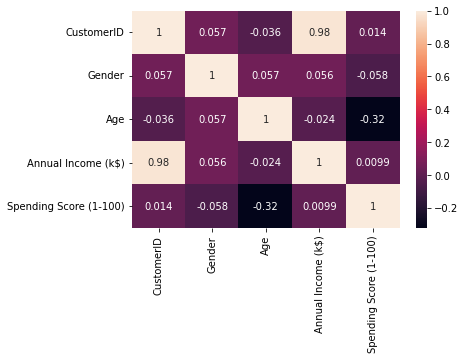

In [ ]:
c=df.corr()
sns.heatmap(c,annot=True)

In [ ]:
df[df["Annual Income (k$)"]>20]#data with income more than $20

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
16,17,0,32.0,21,35,2
17,18,1,20.0,21,66,2
18,19,1,52.0,23,29,2
19,20,0,35.0,23,98,2
20,21,1,35.0,24,35,2
...,...,...,...,...,...,...
195,196,0,35.0,120,79,1
196,197,0,45.0,126,28,0
197,198,1,32.0,126,74,1
198,199,1,32.0,137,18,0


In [ ]:
df[df["Annual Income (k$)"]>20].count()

CustomerID                184
Gender                    184
Age                       184
Annual Income (k$)        184
Spending Score (1-100)    184
cluster                   184
dtype: int64

In [ ]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [ ]:
df.mean()

CustomerID                100.500
Gender                      0.440
Age                        38.805
Annual Income (k$)         60.560
Spending Score (1-100)     50.200
dtype: float64

In [ ]:
df.sum()

CustomerID                20100.0
Gender                       88.0
Age                        7761.0
Annual Income (k$)        12112.0
Spending Score (1-100)    10040.0
dtype: float64

In [ ]:
df.count()

CustomerID                200
Gender                    200
Age                       200
Annual Income (k$)        200
Spending Score (1-100)    200
dtype: int64

In [ ]:
df.max()

CustomerID                200.0
Gender                      1.0
Age                        70.0
Annual Income (k$)        137.0
Spending Score (1-100)     99.0
dtype: float64

In [ ]:
df.min()

CustomerID                 1.0
Gender                     0.0
Age                       18.0
Annual Income (k$)        15.0
Spending Score (1-100)     1.0
dtype: float64

In [ ]:
df.describe()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,0.440000,38.805000,60.560000,50.200000
std,57.879185,0.497633,13.863548,26.264721,25.823522
min,1.000000,0.000000,18.000000,15.000000,1.000000
25%,50.750000,0.000000,29.000000,41.500000,34.750000
50%,100.500000,0.000000,35.500000,61.500000,50.000000
75%,150.250000,1.000000,49.000000,78.000000,73.000000
max,200.000000,1.000000,70.000000,137.000000,99.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


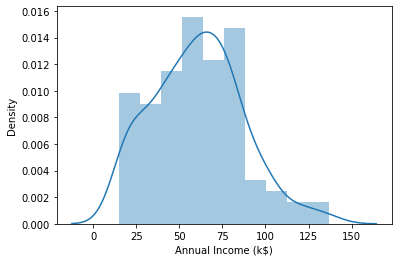

In [ ]:
sns.distplot(df["Annual Income (k$)"])

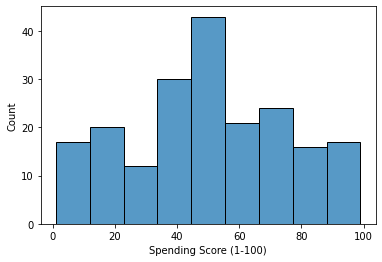

In [ ]:
sns.histplot(df["Spending Score (1-100)"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


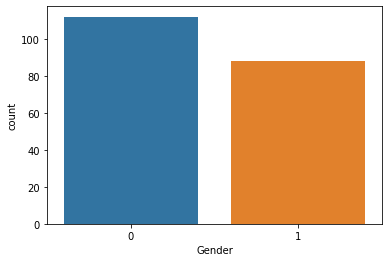

In [ ]:
sns.countplot(df["Gender"])

{'boxes': [<matplotlib.lines.Line2D at 0x7f56d957a850>],
 'caps': [<matplotlib.lines.Line2D at 0x7f56d9565350>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f56d957b350>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f56d9586890>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f56d957a710>,
  <matplotlib.lines.Line2D at 0x7f56d9565850>]}

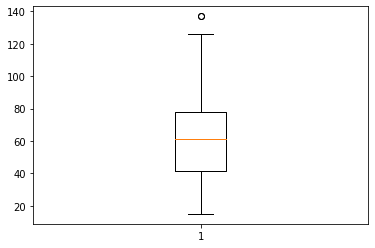

In [ ]:
plt.boxplot(df["Annual Income (k$)"])

Text(0.5, 1.0, 'Annual Income vs Spending Score')

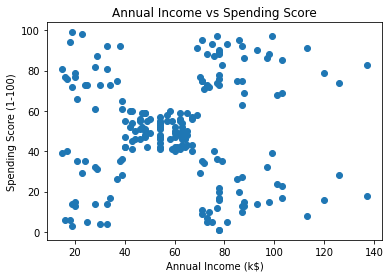

In [ ]:
plt.scatter(df["Annual Income (k$)"],df["Spending Score (1-100)"])
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Annual Income vs Spending Score")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


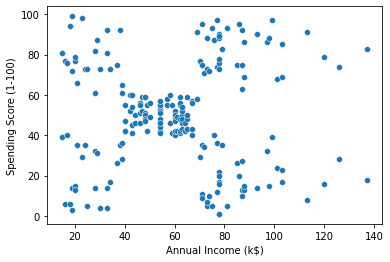

In [ ]:
sns.scatterplot(df["Annual Income (k$)"],df["Spending Score (1-100)"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


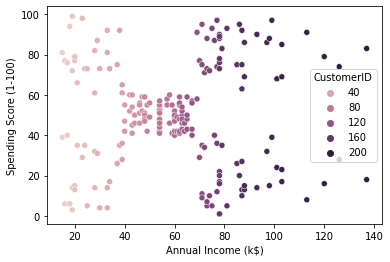

In [ ]:
sns.scatterplot(df["Annual Income (k$)"],df["Spending Score (1-100)"],hue=df["CustomerID"])



In [ ]:
kmeans=KMeans(n_clusters=3)

In [ ]:
kmeans.fit(df.drop(["CustomerID"],axis=1))

KMeans(n_clusters=3)

In [ ]:
df["cluster"]=kmeans.labels_

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


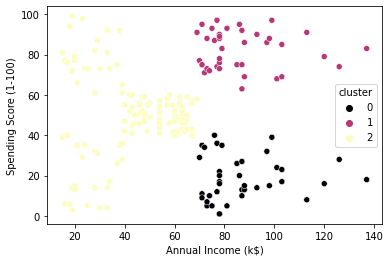

In [ ]:
sns.scatterplot(df["Annual Income (k$)"],df["Spending Score (1-100)"],hue=df["cluster"],palette="magma")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              200 non-null    int64  
 1   Gender                  200 non-null    uint8  
 2   Age                     200 non-null    float64
 3   Annual Income (k$)      200 non-null    int64  
 4   Spending Score (1-100)  200 non-null    int64  
 5   cluster                 200 non-null    int32  
dtypes: float64(1), int32(1), int64(3), uint8(1)
memory usage: 7.4 KB


In [ ]:
x=df.drop(["CustomerID","cluster"],axis=1)
y=df["cluster"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=105)

In [ ]:
error_rate=[]
for i in range(1,40):
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train,y_train)
  pred_i=knn.predict(x_test)
  error_rate.append(np.mean(pred_i != y_test))

Text(0.5, 1.0, 'K Values VS Error Rate')

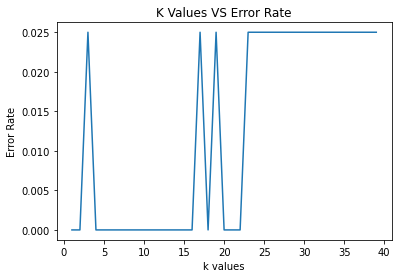

In [ ]:
plt.plot(range(1,40),error_rate)
plt.xlabel("k values")
plt.ylabel("Error Rate")
plt.title("K Values VS Error Rate")

In [ ]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
pred=knn.predict(x_test)

In [ ]:
confusion_matrix(y_test,pred)

array([[ 7,  0,  1],
       [ 0, 10,  0],
       [ 0,  0, 22]])

In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      0.88      0.93         8
           1       1.00      1.00      1.00        10
           2       0.96      1.00      0.98        22

    accuracy                           0.97        40
   macro avg       0.99      0.96      0.97        40
weighted avg       0.98      0.97      0.97        40

